In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv('dataset_dummies2.csv')

In [54]:
df.columns

Index(['global_rank', 'title', 'id', 'release_date', 'day', 'month', 'year',
       'max_theaters_used', 'first_day_sales', 'first_weekend_sales',
       'first_week_sales', 'total_sales', 'viewers_by_theaters', 'tmdb_id',
       'budget', 'imdb_id', 'tagline', 'cast1', 'cast1_popularity', 'cast2',
       'cast2_popularity', 'cast3', 'cast3_popularity', 'cast_popularity',
       'success_abs', 'success_rel', 'success_total', 'hit_or_fail', 'licence',
       'lang_en', 'lang_fr', 'lang_others', 'genre_Action', 'genre_Animation',
       'genre_Comedy', 'genre_Drama', 'genre_Thriller', 'genre_others', 'Q_1',
       'Q_2', 'Q_3', 'Q_4'],
      dtype='object')

In [55]:
X= df[['max_theaters_used','budget','licence', 'lang_en', 'lang_fr', 'lang_others', 'genre_Action', 'genre_Animation', 'genre_Comedy', 'genre_Drama', 'genre_Thriller', 'genre_others', 'Q_1', 'Q_2', 'Q_3', 'Q_4']]
y= df['hit_or_fail']

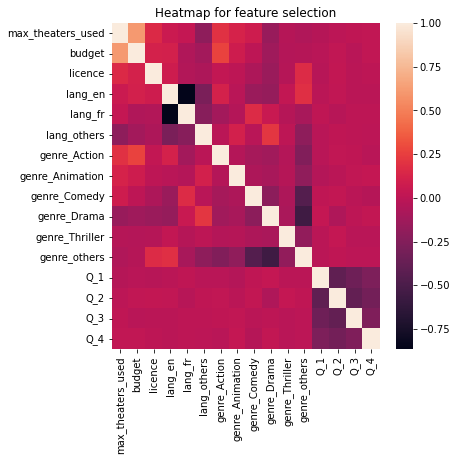

In [56]:

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(X.corr())
plt.title('Heatmap for feature selection')
plt.show()

In [76]:
from locale import normalize
import re
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# SYNTHESIS FUNCTION
def synthetise(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    model_name = type(model).__name__
    print(re.sub(r"(\w)([A-Z])", r"\1 \2", model_name).upper())
    print('====================')
    print('TRAIN dataset')
    print(f'Accuracy score: {accuracy_score(y_train, y_train_pred):.1%}')
    print(f'Recall score (macro): {recall_score(y_train, y_train_pred, average="macro"):.1%}')
    print(f'Precision score (macro): {precision_score(y_train, y_train_pred, average="macro"):.1%}')
    print(f'ROC_AUC score (macro): {roc_auc_score(y_train, y_train_score, average="macro", multi_class="ovo"):.1%}')
    print('====================')
    print('TEST dataset')
    print(f'Accuracy score: {accuracy_score(y_test, y_test_pred):.1%}')
    print(f'Recall score (macro): {recall_score(y_test, y_test_pred, average="macro"):.1%}')
    print(f'Precision score (macro): {precision_score(y_test, y_test_pred, average="macro"):.1%}')
    print(f'ROC_AUC score (macro): {roc_auc_score(y_test, y_test_score, average="macro", multi_class="ovo"):.1%}')
    print(f'\n')

    fig, axs = plt.subplots(1,2, figsize = (12,8))
    ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax = axs[0], cmap = 'Blues', colorbar = False, normalize='all', values_format = '.1%')
    axs[0].set_title('Confusion matrix for TRAIN dataset')
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax = axs[1], cmap = 'Blues', colorbar = False, normalize='all', values_format = '.1%')
    axs[1].set_title('Confusion matrix for TEST dataset')
    fig.tight_layout()
    fig.show()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [59]:
from sklearn.metrics import accuracy_score
a= clf.predict(X_test)
acc=accuracy_score(y_test,a)

acc

0.4861111111111111

In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

#best_random = rf_random.best_estimator_
#evaluate(best_random, x_test, y_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

[[167  41  23   5]
 [ 79  66  27  11]
 [ 51  45  66  26]
 [  7  10  30 138]]
0.5517676767676768


In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(2,20,2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [64]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [2, 4, 6, 8, 10, 12, 14,
                                                         16, 18]},
                   random_state=42, verbose=2)

In [65]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 14}

In [66]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

0.5467171717171717
[[170  45  18   3]
 [ 92  52  29  10]
 [ 56  36  72  24]
 [  3  10  33 139]]


In [67]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [110],
    'max_features': ['sqrt'],
    'min_samples_leaf': [4],
    'min_samples_split': [10],
    'n_estimators': [12]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [110],
                         'max_features': ['sqrt'], 'min_samples_leaf': [4],
                         'min_samples_split': [10], 'n_estimators': [12]},
             verbose=2)

In [68]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 12}

In [69]:
best_grid = grid_search.best_estimator_
evaluate(best_grid,X_test,y_test)

0.5429292929292929
[[179  34  19   4]
 [ 93  49  29  12]
 [ 60  31  66  31]
 [  3   9  37 136]]


In [71]:
from tpot import TPOTClassifier

In [73]:
#tpot = TPOTClassifier(generations=5, population_size=50, verbosity=3)
#tpot.fit(X_train, y_train)
#print(tpot.score(X_test, y_test))
#tpot.export(r'C:\Users\lenovo\tpot_digits_pipeline.py')

In [ ]:
#KNEIGHBOR CLASSIFIERS TESTING

In [74]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

K NEIGHBORS CLASSIFIER
TRAIN dataset
Accuracy score: 73.8%
Recall score (macro): 71.7%
Precision score (macro): 74.3%
ROC_AUC score (macro): 94.0%
TEST dataset
Accuracy score: 62.6%
Recall score (macro): 61.4%
Precision score (macro): 64.2%
ROC_AUC score (macro): 83.0%




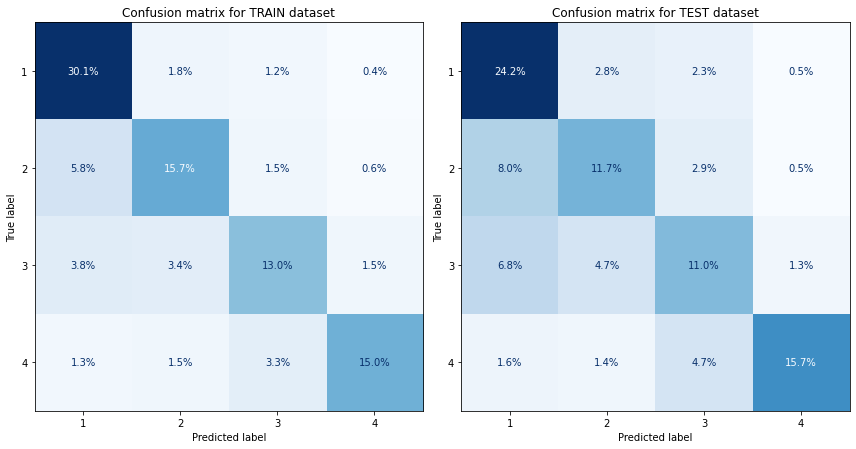

In [78]:
synthetise(neigh,X_train,X_test,y_train,y_test)

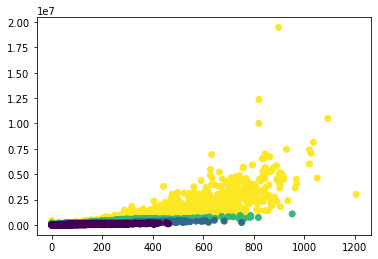

In [116]:
plt.scatter(df['max_theaters_used'],df['total_sales'],c=df['hit_or_fail'])